In [1]:
pwd

'/Users/Chanti'

In [2]:
cd '/Users/Chanti/Desktop/USF'

/Users/Chanti/Desktop/USF


In [3]:
from __future__ import absolute_import, division, print_function

In [4]:
import codecs
import glob
import logging
import multiprocessing
import os
import pprint
import re

In [5]:
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [8]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /Users/Chanti/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Chanti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
book_names = sorted(glob.glob("./*.txt"))

In [10]:
print("Found books:")
book_names

Found books:


['./got1.txt', './got2.txt', './got3.txt', './got4.txt', './got5.txt']

In [11]:
corpus = u''
for book_name in book_names:
    print("Reading '{0}'...".format(book_name))
    with codecs.open(book_name,"r","Latin1") as book_file:
        corpus += book_file.read()
    print("Corpus is now {0} characters long".format(len(corpus)))
    print()

Reading './got1.txt'...
Corpus is now 1770660 characters long

Reading './got2.txt'...
Corpus is now 3172017 characters long

Reading './got3.txt'...
Corpus is now 4003969 characters long

Reading './got4.txt'...
Corpus is now 5089222 characters long

Reading './got5.txt'...
Corpus is now 5919089 characters long



In [12]:
#Load the English pickle tokenizer from punkt
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [13]:
#Tokenize the corpus into sentences
raw_sentences = tokenizer.tokenize(corpus)

In [14]:
#Convert sentences into list of words
#remove unecessary characters, split into words, remove hyphens and special characters
def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-Z]"," ", raw)
    words = clean.split()
    return words


In [15]:
#for each sentence, sentences where each word is tokenized
sentences = []
for raw_sentence in raw_sentences:
    if len(raw_sentence) > 0:
        sentences.append(sentence_to_wordlist(raw_sentence))

In [16]:
print(raw_sentences[50])
print(sentence_to_wordlist(raw_sentences[50]))

Two years past, he had fallen and shattered a hip, and it had never mended properly.
['Two', 'years', 'past', 'he', 'had', 'fallen', 'and', 'shattered', 'a', 'hip', 'and', 'it', 'had', 'never', 'mended', 'properly']


In [17]:
#count tokens, each one being a sentence
token_count = sum([len(sentence) for sentence in sentences])
print("The book corpus contains {0:,} tokens".format(token_count))

The book corpus contains 1,110,288 tokens


In [18]:
#Define hyperparameters

# Dimensionality of the resulting word vectors.
num_features = 300

# Minimum word count threshold.
min_word_count = 3

# Number of threads to run in parallel.
num_workers = multiprocessing.cpu_count()

# Context window length.
context_size = 7

# Downsample setting for frequent words.
downsampling = 1e-3

# Seed for the RNG, to make the results reproducible.
seed = 1

In [19]:
got2vec = w2v.Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
)

In [20]:
got2vec.build_vocab(sentences,progress_per=10000, keep_raw_vocab=False, trim_rule=None)

2018-06-10 23:06:03,435 : INFO : collecting all words and their counts
2018-06-10 23:06:03,442 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-06-10 23:06:03,501 : INFO : PROGRESS: at sentence #10000, processed 141019 words, keeping 10280 word types
2018-06-10 23:06:03,547 : INFO : PROGRESS: at sentence #20000, processed 279976 words, keeping 13565 word types
2018-06-10 23:06:03,593 : INFO : PROGRESS: at sentence #30000, processed 420646 words, keeping 16602 word types
2018-06-10 23:06:03,640 : INFO : PROGRESS: at sentence #40000, processed 556994 words, keeping 18330 word types
2018-06-10 23:06:03,695 : INFO : PROGRESS: at sentence #50000, processed 699254 words, keeping 20291 word types
2018-06-10 23:06:03,747 : INFO : PROGRESS: at sentence #60000, processed 835958 words, keeping 21841 word types
2018-06-10 23:06:03,806 : INFO : PROGRESS: at sentence #70000, processed 970547 words, keeping 23057 word types
2018-06-10 23:06:03,849 : INFO : collected 239

In [21]:
#train model on sentences
got2vec.train(sentences, total_examples=got2vec.corpus_count, 
              total_words=None, epochs=got2vec.iter, 
              start_alpha=None, end_alpha=None, word_count=0, 
              queue_factor=2, report_delay=1.0, compute_loss=False)

2018-06-10 23:06:04,319 : INFO : training model with 4 workers on 13351 vocabulary and 300 features, using sg=1 hs=0 sample=0.001 negative=5 window=7
2018-06-10 23:06:05,342 : INFO : PROGRESS: at 3.73% examples, 160036 words/s, in_qsize 7, out_qsize 0
2018-06-10 23:06:06,389 : INFO : PROGRESS: at 8.22% examples, 171593 words/s, in_qsize 7, out_qsize 0
2018-06-10 23:06:07,409 : INFO : PROGRESS: at 12.59% examples, 174664 words/s, in_qsize 7, out_qsize 0
2018-06-10 23:06:08,414 : INFO : PROGRESS: at 17.04% examples, 176645 words/s, in_qsize 7, out_qsize 0
2018-06-10 23:06:09,428 : INFO : PROGRESS: at 21.37% examples, 178994 words/s, in_qsize 7, out_qsize 0
2018-06-10 23:06:10,470 : INFO : PROGRESS: at 25.35% examples, 176095 words/s, in_qsize 7, out_qsize 0
2018-06-10 23:06:11,471 : INFO : PROGRESS: at 29.53% examples, 176031 words/s, in_qsize 7, out_qsize 0
2018-06-10 23:06:12,483 : INFO : PROGRESS: at 33.42% examples, 174908 words/s, in_qsize 8, out_qsize 0
2018-06-10 23:06:13,552 : IN

4258565

In [22]:
#save model
if not os.path.exists("trained"):
    os.makedirs("trained")

In [23]:
got2vec.wv.save(os.path.join("trained", "got2vec.w2v"), ignore=[])

2018-06-10 23:06:28,326 : INFO : saving KeyedVectors object under trained/got2vec.w2v, separately None
2018-06-10 23:06:28,767 : INFO : saved trained/got2vec.w2v


In [24]:
#load model
got2vec = w2v.KeyedVectors.load(os.path.join("trained", "got2vec.w2v"))

2018-06-10 23:06:28,787 : INFO : loading KeyedVectors object from trained/got2vec.w2v
2018-06-10 23:06:29,362 : INFO : loaded trained/got2vec.w2v


In [25]:
#Squash dimensionality to 2
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)

In [26]:
#Put all the word vectors into one big matrix
all_word_vectors_matrix = got2vec.wv.syn0

In [27]:
print (all_word_vectors_matrix)

[[ 0.09056767  0.13808218 -0.15090199 ..., -0.0429583   0.37500036
   0.08323756]
 [ 0.21597612  0.14266475  0.10169824 ..., -0.24987067  0.23634805
  -0.0658862 ]
 [ 0.1161018   0.00083609 -0.12968211 ..., -0.02102427  0.14930068
   0.15946394]
 ..., 
 [ 0.04589215 -0.00924069  0.12722564 ..., -0.08988392  0.07124554
   0.0107049 ]
 [ 0.04099707  0.02326098  0.16791834 ..., -0.11710527  0.07844222
   0.03250155]
 [ 0.00718155 -0.00764655  0.14178357 ..., -0.06933824  0.05238995
   0.02870508]]


In [28]:
#train tsne
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

In [29]:
#plot point in 2d space
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[got2vec.vocab[word].index])
            for word in got2vec.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [30]:
points.head(20)

,word,x,y
0,This,49.950523,-25.327841
1,edition,35.310001,56.534756
2,the,-1.957921,-10.210916
3,complete,14.203405,1.723180
4,of,-32.203743,38.342068
5,original,7.682618,44.520737
6,hardcover,32.301609,53.877991
7,ONE,17.199678,45.970676
8,A,4.724955,-11.747786
9,OF,37.043114,58.189484


In [31]:
# Plotting using the seaborn library
sns.set_context("poster")

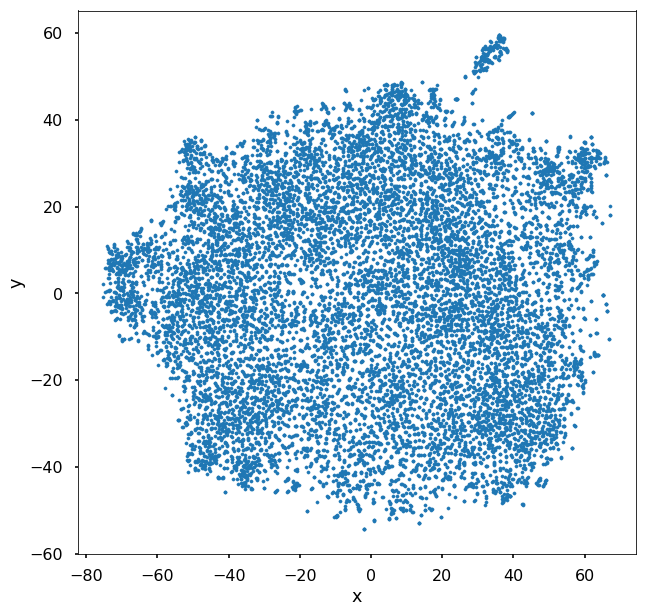

In [32]:
points.plot.scatter("x", "y", s=10, figsize=(10, 10))

In [33]:
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

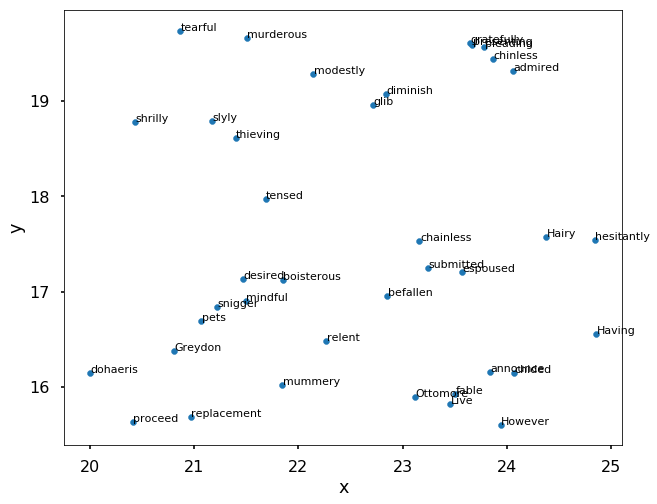

In [34]:
plot_region(x_bounds=(20.0, 25.0), y_bounds=(15.5, 20.0))

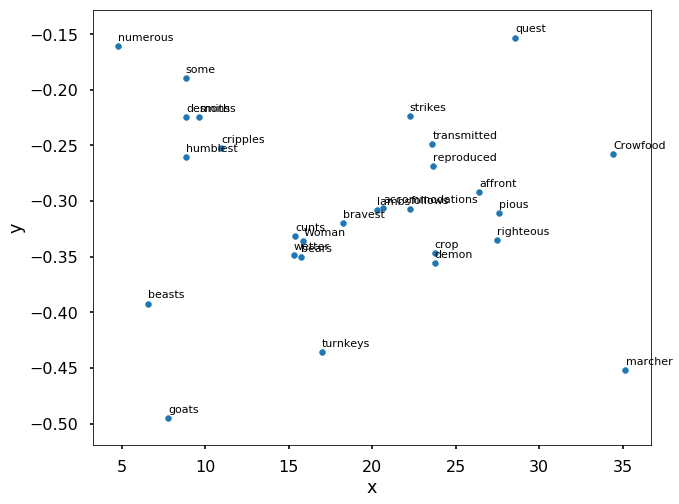

In [35]:
plot_region(x_bounds=(4, 41), y_bounds=(-0.5, -0.1))

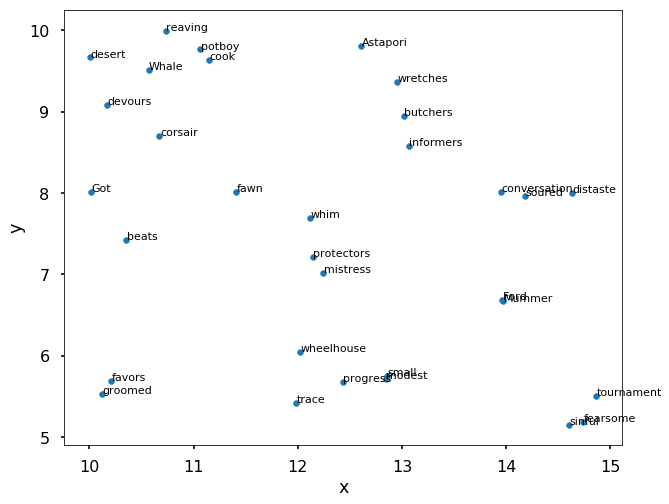

In [36]:
plot_region(x_bounds=(10, 15), y_bounds=(5, 10))

In [37]:
got2vec.most_similar("Stark")

2018-06-10 23:19:58,525 : INFO : precomputing L2-norms of word weight vectors


[('Eddard', 0.7668936252593994),
 ('Winterfell', 0.7056568264961243),
 ('Robb', 0.6961060762405396),
 ('ward', 0.6951630711555481),
 ('Benjen', 0.6915132403373718),
 ('beheaded', 0.691235363483429),
 ('Brandon', 0.6858698725700378),
 ('Rickard', 0.6805354952812195),
 ('Roslin', 0.6784009337425232),
 ('Tully', 0.6777351498603821)]

In [38]:
got2vec.most_similar("Lannister")

[('pays', 0.7002766728401184),
 ('debts', 0.6817960143089294),
 ('Kevan', 0.6544679999351501),
 ('Kingslayer', 0.6358460783958435),
 ('lion', 0.6246482133865356),
 ('Jaime', 0.6158034205436707),
 ('scorn', 0.6151726245880127),
 ('Cersei', 0.6130942702293396),
 ('Stafford', 0.6115696430206299),
 ('Tywin', 0.6111588478088379)]

In [39]:
got2vec.most_similar("Jon")

[('Snow', 0.743793249130249),
 ('Sam', 0.7024655938148499),
 ('Theon', 0.6459170579910278),
 ('Qhorin', 0.6453526616096497),
 ('Ygritte', 0.6438825130462646),
 ('Pyp', 0.6253669261932373),
 ('Ned', 0.6234972476959229),
 ('Ghost', 0.6164664626121521),
 ('Benjen', 0.6151096224784851),
 ('Reek', 0.6134048700332642)]

In [40]:
#distance, similarity, and ranking
def nearest_similarity_cosmul(start1, end1, end2):
    similarities = got2vec.most_similar_cosmul(
        positive=[end2, start1],
        negative=[end1]
    )
    start2 = similarities[0][0]
    print("{start1} is related to {end1}, as {start2} is related to {end2}".format(**locals()))
    return start2


In [41]:
nearest_similarity_cosmul("Stark", "Winterfell", "Riverrun")
nearest_similarity_cosmul("Jaime", "sword", "wine")
nearest_similarity_cosmul("Arya", "Nymeria", "dragons")

Stark is related to Winterfell, as Tully is related to Riverrun
Jaime is related to sword, as Cersei is related to wine
Arya is related to Nymeria, as Dany is related to dragons


'Dany'